# Diabetes prediction model <br>
Ellion Blessan <br>
ellionblessan@gmail.com <br>
Dataset: [Diabetes Dataset | Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

## Dataset loading

In [32]:
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
!pip install -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rleonb","key":"7a755e4b1cd0edc5eeb3429063bda95d"}'}

In [7]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 47.7MB/s]


In [10]:
local_zip = 'stroke-prediction-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory Data Analysis

In [12]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
stroke.loc[(stroke['bmi'].isna())]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [15]:
stroke = stroke.dropna()

In [16]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


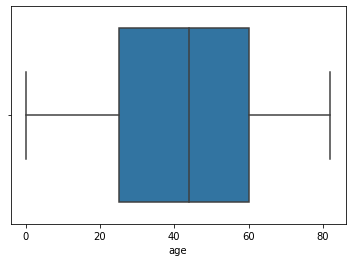

In [17]:
sns.boxplot(x=stroke['age'])

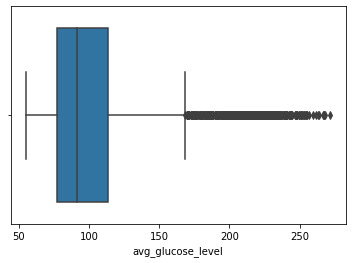

In [18]:
sns.boxplot(x=stroke['avg_glucose_level'])

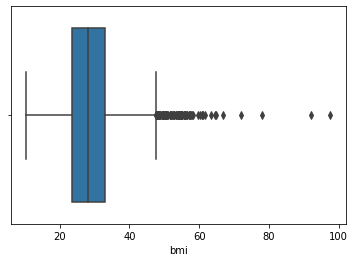

In [19]:
sns.boxplot(x=stroke['bmi'])

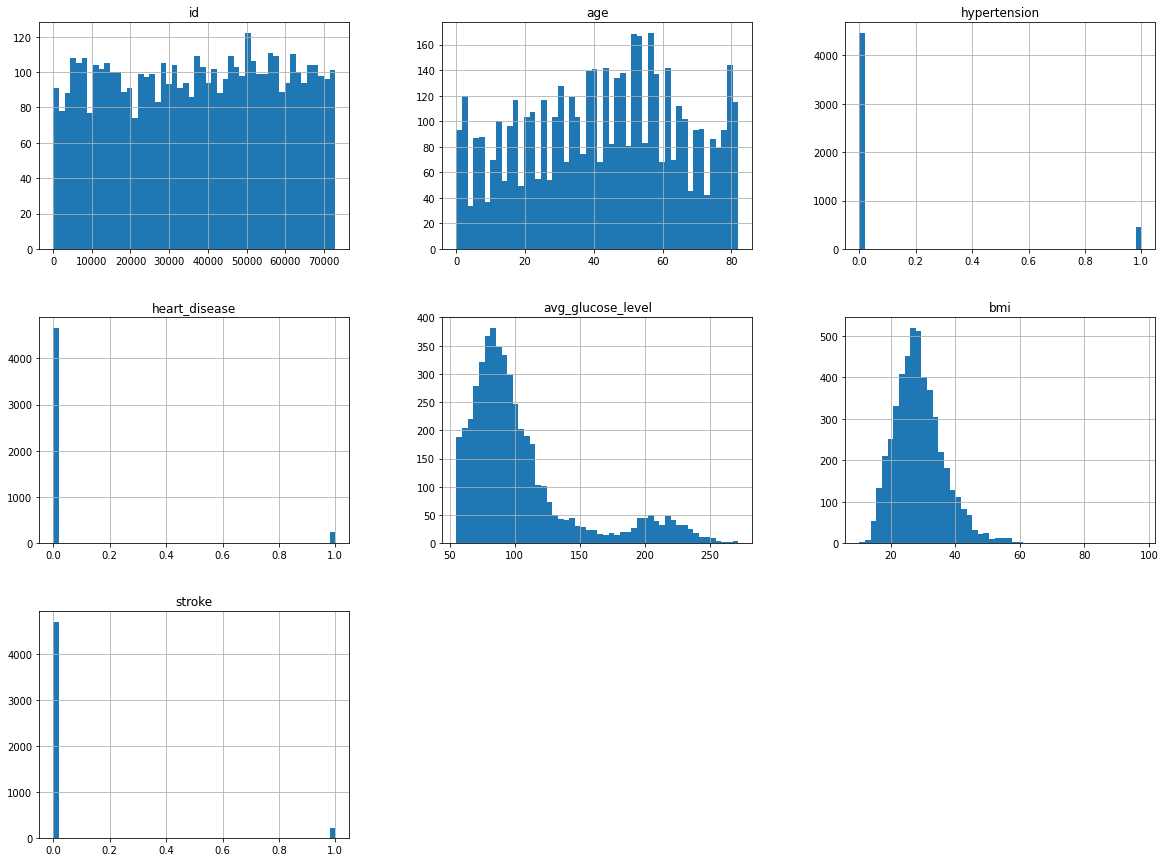

In [20]:
stroke.hist(bins=50, figsize=(20,15))
plt.show()

## Data preparation

In [21]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
stroke.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [23]:
stroke = stroke[stroke.gender != 'Other']

In [24]:
stroke['ever_married'] = stroke['ever_married'].replace(['Yes'], 1)
stroke['ever_married'] = stroke['ever_married'].replace(['No'], 0)

In [25]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [34]:
stroke = pd.concat([stroke, pd.get_dummies(stroke['gender'], prefix='gender')],axis=1)
stroke.drop(['gender'], axis=1, inplace=True)
stroke.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,...,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,9046,67.0,0,1,1,228.69,36.6,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,31112,80.0,0,1,1,105.92,32.5,1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,60182,49.0,0,0,1,171.23,34.4,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,1665,79.0,1,0,1,174.12,24.0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
5,56669,81.0,0,0,1,186.21,29.0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [26]:
stroke = pd.concat([stroke, pd.get_dummies(stroke['work_type'], prefix='work_type')],axis=1)
stroke = pd.concat([stroke, pd.get_dummies(stroke['Residence_type'], prefix='Residence_type')],axis=1)
stroke = pd.concat([stroke, pd.get_dummies(stroke['smoking_status'], prefix='smoking_status')],axis=1)
stroke.drop(['work_type','Residence_type','smoking_status'], axis=1, inplace=True)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,1,0,0


In [43]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4908 non-null   int64  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   ever_married                    4908 non-null   int64  
 5   avg_glucose_level               4908 non-null   float64
 6   bmi                             4908 non-null   float64
 7   stroke                          4908 non-null   int64  
 8   work_type_Govt_job              4908 non-null   uint8  
 9   work_type_Never_worked          4908 non-null   uint8  
 10  work_type_Private               4908 non-null   uint8  
 11  work_type_Self-employed         4908 non-null   uint8  
 12  work_type_children              49

In [44]:
X = stroke.drop(['stroke'], axis =1)
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21112022)

In [45]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4908
Total # of sample in train dataset: 3926
Total # of sample in test dataset: 982


In [46]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,avg_glucose_level,bmi
4932,-0.661671,-0.416114,1.236797
153,1.117911,-0.613638,-0.173079
4062,1.162400,-0.302858,-0.401708
4581,-1.889582,-0.437686,-1.455940
3697,0.717505,-0.603301,0.271476


## Model

In [70]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [63]:
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'], 
                      columns=['SVM', 'NBC', 'KNN', 'RandomForest', 'Boosting'])

In [64]:
svc = svm.SVC()
svc.fit(X_train, y_train)

models.loc['train_accuracy','SVM'] = accuracy_score(y_pred = svc.predict(X_train), y_true=y_train)

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

models.loc['train_accuracy','NBC'] = accuracy_score(y_pred = gnb.predict(X_train), y_true=y_train)

In [67]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
 
models.loc['train_accuracy','knn'] = accuracy_score(y_pred = knn.predict(X_train), y_true=y_train)

In [69]:
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=21112022, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_accuracy','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)

In [71]:
boosting = AdaBoostClassifier(learning_rate=0.01, random_state=21112022)                             
boosting.fit(X_train, y_train)

models.loc['train_accuracy','Boosting'] = accuracy_score(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi

In [72]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [73]:
accuracy = pd.DataFrame(columns=['train', 'test'], index=['SVM', 'NBC', 'KNN', 'RandomForest', 'Boosting'])
 
model_dict = {'SVM': svc,'NBC': gnb, 'KNN': knn, 'RandomForest': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
  accuracy.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))/1e3 
  accuracy.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
accuracy

,train,test
SVM,0.00096,0.000949
NBC,0.000949,0.000949
KNN,0.00096,0.000949
RandomForest,0.000999,0.000949
Boosting,0.00096,0.000949


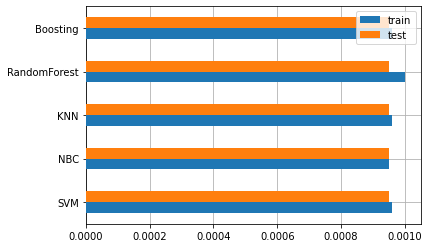

In [74]:
fig, ax = plt.subplots()
accuracy.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [79]:
prediksi = X_test.iloc[1:].copy()
pred_dict = {'y_true':y_test[1:]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_SVM,prediksi_NBC,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting
529,0,0,0,0,0,0
4931,0,0,0,0,0,0
3349,0,0,0,0,0,0
4902,0,0,0,0,0,0
4239,0,0,0,0,0,0
...,...,...,...,...,...,...
3750,0,0,0,0,0,0
245,1,0,0,0,0,0
437,0,0,0,0,0,0
4587,0,0,0,0,0,0
